# Numpy, Matplotlib and Sklearn Tutorial

We often use numpy to handle high dimensional arrays.

Let's try the basic operation of numpy:

In [1]:
from sklearn.datasets.base import get_data_home 
print (get_data_home())

C:\Users\dell\scikit_learn_data


In [2]:
import numpy as np

a = np.array([[1,2,3], [2,3,4]])
print(a.ndim, a.shape, a.size, a.dtype, type(a))

b = np.zeros((3,4))
c = np.ones((3,4))
d = np.random.randn(2,3)
e = np.array([[1,2], [2,3], [3,4]])
f = b*2 - c*3
g = 2*c*f
h = np.dot(a,e)
i = d.mean()
j = d.max(axis=1)
k = a[-1][:2]
l = np.array([[1,2,3],[2,3,5]])
# You can print a to k for details

2 (2, 3) 6 int32 <class 'numpy.ndarray'>


print(维度，形状，大小，元素类型，数组类型)
np.random.randn(d0,d1...dn)标准（高斯）正态分布 （0,1）
如果想得到（2,9）的可以
3*np.random.randn()+2
np.dot(a,e)矩阵点乘
d.mean()取平均
d.max(axis=1)第二个轴取最大（即横向的最大），axis=0时取纵向最大
a[-1][:2]
-1从后往前数  ：2从开始到2之前（0~1）

matplotlib.pyplot provides very useful apis for drawing graphs.

Let's try the basic operation of matplotlib.pyplot:

In [3]:
import matplotlib.pyplot as plt

x = np.arange(2, 10, 0.2)
print(x)
plt.plot(x, x**1.5*.5, 'r-', x, np.log(x)*5, 'g--', x, x, 'b.')
plt.show()

[2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4
 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.  7.2 7.4 7.6 7.8 8.  8.2 8.4 8.6 8.8 9.
 9.2 9.4 9.6 9.8]


<Figure size 640x480 with 1 Axes>

np.arrange(2,10,0.2)从2到10步幅为0.2

If you want to print them in different graphs, try this:

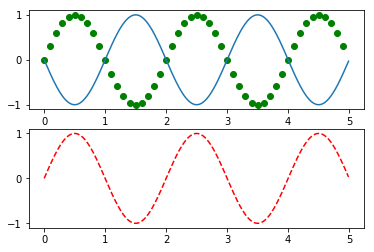

In [4]:
def f(x):
    return np.sin(np.pi*x)

x1 = np.arange(0, 5, 0.1)
x2 = np.arange(0, 5, 0.01)

plt.subplot(211)
plt.plot(x1, f(x1), 'go', x2, f(x2-1))

plt.subplot(212)
plt.plot(x2, f(x2), 'r--')
plt.show()

go表示绿色圆点
默认为蓝色的实线

How about printing images?

Let's try to print a image whose pixels gradually change:

Different pixel values represent different gray levels.

[[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.83203125e-02
  2.92968750e-02 3.02734375e-02]
 [3.12500000e-02 3.22265625e-02 3.32031250e-02 ... 5.95703125e-02
  6.05468750e-02 6.15234375e-02]
 [6.25000000e-02 6.34765625e-02 6.44531250e-02 ... 9.08203125e-02
  9.17968750e-02 9.27734375e-02]
 ...
 [9.06250000e-01 9.07226562e-01 9.08203125e-01 ... 9.34570312e-01
  9.35546875e-01 9.36523438e-01]
 [9.37500000e-01 9.38476562e-01 9.39453125e-01 ... 9.65820312e-01
  9.66796875e-01 9.67773438e-01]
 [9.68750000e-01 9.69726562e-01 9.70703125e-01 ... 9.97070312e-01
  9.98046875e-01 9.99023438e-01]]


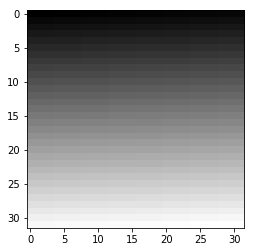

In [5]:
img = np.arange(0, 1, 1/32/32) # define an 1D array with 32x32 elements gradually increasing
img = img.reshape(32, 32) # reshape it into 32x32 array, the array represents a 32x32 image,
                          # each element represents the corresponding pixel of the image
print(img)
plt.imshow(img, cmap='gray')
#plt.imshow(img)
plt.show()

第一行多为零
最后一行多为一

Based on numpy, Scikit-learn (sklearn) provides a lot of tools for machine learning.It is a very powerful machine learning library.

Then, let's use it for mnist classification:

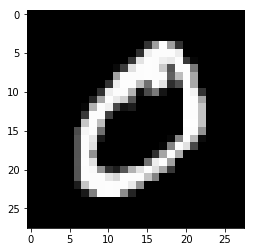

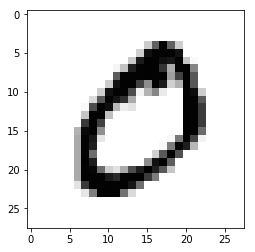

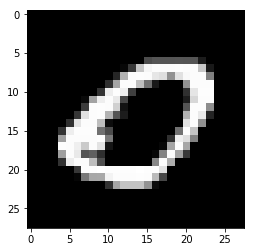

In [6]:
from sklearn.datasets import fetch_mldata

# download and read mnist
#mnist = fetch_mldata('MNIST original', data_home='./')
mnist = fetch_mldata('MNIST original', data_home='C:/Users/dell/scikit_learn_data')
# 'mnist.data' is 70k x 784 array, each row represents the pixels from a 28x28=784 image
# 'mnist.target' is 70k x 1 array, each row represents the target class of the corresponding image
images = mnist.data
targets = mnist.target

# make the value of pixels from [0, 255] to [0, 1] for further process
X = mnist.data / 255.
Y = mnist.target

# print the first image of the dataset
img1 = X[0].reshape(28, 28)
plt.imshow(img1, cmap='gray')
plt.show()

# print the images after simple transformation
img2 = 1 - img1
plt.imshow(img2, cmap='gray')
plt.show()

img3 = img1.transpose()
plt.imshow(img3, cmap='gray')
plt.show()

In [7]:
# split data to train and test (for faster calculation, just use 1/10 data)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X[::10], Y[::10], test_size=1000)

X[x:y:z]从x到y步长为z不包含y

#### Q1:
Please use the logistic regression(default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [8]:
# TODO:use logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
lr.fit(X_train,Y_train)

Y_train_pred = lr.predict(X_train)
train_accuracy = np.mean(Y_train_pred == Y_train)
Y_test_pred = lr.predict(X_test)
test_accuracy = np.mean(Y_test_pred == Y_test)
#相等预测正确记为1，否则为0.最后取平均

print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 95.87%
Testing accuracy: 89.90%


#### Q2:
Please use the naive bayes(Bernoulli, default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [9]:
# TODO:use naive bayes
from sklearn.naive_bayes import BernoulliNB

bn = BernoulliNB()
bn.fit(X_train,Y_train)

Y_train_pred = bn.predict(X_train)
train_accuracy = np.mean(Y_train_pred == Y_train)
Y_test_pred = bn.predict(X_test)
test_accuracy = np.mean(Y_test_pred == Y_test)

print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 84.17%
Testing accuracy: 81.40%


#### Q3:
Please use the support vector machine(default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [10]:
# TODO:use support vector machine
from sklearn.svm import LinearSVC

ls = LinearSVC()
ls.fit(X_train,Y_train)

Y_train_pred = ls.predict(X_train)
train_accuracy = np.mean(Y_train_pred == Y_train)
Y_test_pred = ls.predict(X_test)
test_accuracy = np.mean(Y_test_pred == Y_test)



print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 98.10%
Testing accuracy: 85.90%


#### Q4:
Please adjust the parameters of SVM to increase the testing accuracy, and print the training accuracy and test accuracy.

In [11]:
# TODO:use SVM with another group of parameters

ls = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=0.009, multi_class='crammer_singer',
                      fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)

ls.fit(X_train,Y_train)
Y_train_pred = ls.predict(X_train)
train_accuracy = np.mean(Y_train_pred == Y_train)
Y_test_pred = ls.predict(X_test)
test_accuracy = np.mean(Y_test_pred == Y_test)


print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 92.73%
Testing accuracy: 90.10%


原始准确率为87.60%
调整C = 1.0到0.009上升至89.50%
再调整multi_class = 'ovr'到'crammer_singer'上升至90.60%

class   sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr',
                  fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
   
   penalty: 正则化参数，L1和L2两种参数可选，仅LinearSVC有。

　　loss: 损失函数，有‘hinge’和‘squared_hinge’两种可选，前者又称L1损失，后者称为L2损失，默认是是’squared_hinge’，其中hinge是SVM的标准损失，squared_hinge是hinge的平方

　　dual: 是否转化为对偶问题求解，默认是True。

　　tol: 残差收敛条件，默认是0.0001，与LR中的一致。

　　C: 惩罚系数，用来控制损失函数的惩罚系数，类似于LR中的正则化系数。

　　multi_class: 负责多分类问题中分类策略制定，有‘ovr’和‘crammer_singer’ 两种参数值可选，默认值是’ovr’，'ovr'的分类原则是将待分类中的某一类当作正类，其他全部归为负类，通过这样求取得到每个类别作为正类时的正确率，取正确率最高的那个类别为正类；‘crammer_singer’ 是直接针对目标函数设置多个参数值，最后进行优化，得到不同类别的参数值大小

　　fit_intercept: 是否计算截距，与LR模型中的意思一致。

　　class_weight: 与其他模型中参数含义一样，也是用来处理不平衡样本数据的，可以直接以字典的形式指定不同类别的权重，也可以使用balanced参数值。

　　verbose: 是否冗余，默认是False。

　　random_state: 随机种子。

　　max_iter: 最大迭代次数，默认是1000。
